In [ ]:
#Q1.
"""
Project Description
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.
Attribute Information-
1.	 Id number: 1 to 214
2.	 RI: refractive index
3.	Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4.	Mg: Magnesium
5.	Al: Aluminum
6.	Si: Silicon
7.	K: Potassium
8.	Ca: Calcium
9.	Ba: Barium
10.	Fe: Iron
11.	Type of glass: (class attribute)
•	1- building_windows_float_processed
•	2- building_windows_non_float_processed
•	3- vehicle_windows_float_processed
•	4- vehicle_windows_non_float_processed (none in this database)
•	5- containers
•	6- tableware
•	7- headlamps
There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 
Predict : Type of glass

Dataset Link-
•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv
•	https://github.com/dsrscientist/dataset3       """


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix #not required as its copied

# Load the dataset
df = pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv")
df


,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [21]:
# Define column names
column_names = ['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type']

# Load the dataset with specified column names
url = "https://raw.githubusercontent.com/dsrscientist/dataset3/main/glass.csv"
df = pd.read_csv(url, names=column_names, header=None)
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [22]:
# Display the first few rows of the dataset
print(df.head())

   Id       RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0   1  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1   2  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2   3  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3   4  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4   5  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [23]:
df.shape # to check the dimension of the data set (rows, columns)

(214, 11)

In [24]:
df.dtypes #Checking the types of columns

Id        int64
RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [25]:
#checking the null Values
df.isnull().sum()

Id      0
RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [26]:
df.info() #detailed information about the data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      214 non-null    int64  
 1   RI      214 non-null    float64
 2   Na      214 non-null    float64
 3   Mg      214 non-null    float64
 4   Al      214 non-null    float64
 5   Si      214 non-null    float64
 6   K       214 non-null    float64
 7   Ca      214 non-null    float64
 8   Ba      214 non-null    float64
 9   Fe      214 non-null    float64
 10  Type    214 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.5 KB


In [27]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,107.500000,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,61.920648,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,54.250000,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,107.500000,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,160.750000,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [28]:
#checking the value count of each column
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

1      1
135    1
137    1
138    1
139    1
      ..
75     1
76     1
77     1
78     1
214    1
Name: Id, Length: 214, dtype: int64


1.52152    3
1.51590    3
1.51645    3
1.51754    2
1.51841    2
          ..
1.51625    1
1.51569    1
1.51605    1
1.51588    1
1.51651    1
Name: RI, Length: 178, dtype: int64


13.02    5
13.21    5
13.00    5
13.64    4
13.33    4
        ..
13.34    1
13.31    1
14.17    1
13.51    1
14.23    1
Name: Na, Length: 142, dtype: int64


0.00    42
3.48     8
3.58     8
3.54     8
3.52     7
        ..
2.76     1
3.15     1
2.90     1
3.83     1
1.78     1
Name: Mg, Length: 94, dtype: int64


1.54    8
1.19    6
1.43    5
1.29    5
1.23    5
       ..
1.08    1
1.64    1
1.61    1
1.07    1
1.94    1
Name: Al, Length: 118, dtype: int64


72.86    4
72.99    4
73.10    4
73.28    4
73.11    4
        ..
73.55    1
72.34    1
72.26    1
73.26    1
73.61    1
Name: Si, Length: 133, dtype: int64


0.00    30
0.57    12
0.56    11
0.60    11
0.58    10
   

In [29]:
# Check the distribution of the target variable
df['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

In [30]:
#checking number of unique value in each column
df.nunique().to_frame('no. of unique values')

,no. of unique values
Id,214
RI,178
Na,142
Mg,94
Al,118
Si,133
K,65
Ca,143
Ba,34
Fe,32


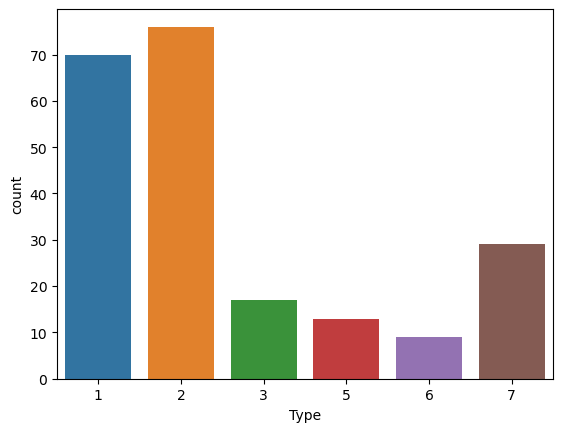

In [31]:
# Visualize the distribution of the target variable
sns.countplot(x='Type', data=df)
plt.show()

In [32]:
# Drop unnecessary columns (e.g., 'Id number')
df = df.drop('Id', axis=1)
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [39]:
#correlation between features and the target variable
correlation= df.corr()['Type'].sort_values(ascending= False)

# Display the correlation values
print(correlation)

Type    1.000000
Al      0.598829
Ba      0.575161
Na      0.502898
Si      0.151565
Ca      0.000952
K      -0.010054
RI     -0.164237
Fe     -0.188278
Mg     -0.744993
Name: Type, dtype: float64


In [40]:
# Split the dataset into features (x) and target variable (y)
x = df.drop(['Type'], axis=1)
y = df['Type']

In [45]:
#important necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [66]:
# Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

maxAccu = 0
maxRS = 0

for i in range(1, 200):
    # Split the dataset into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=i)
    
    # Initialize RandomForestClassifier
    RFR = RandomForestClassifier()
    
    # Train the model
    RFR.fit(x_train, y_train)
    
    # Make predictions
    pred = RFR.predict(x_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, pred)
    
    # Update max accuracy and corresponding random state if the current accuracy is higher
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i

print("Best accuracy is", maxAccu, "at random_state", maxRS)


Best accuracy is 0.8923076923076924 at random_state 79


In [67]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=maxRS)

In [68]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge


In [72]:
# Initialize Linear Regression model
LR = LinearRegression()

# Fit the model to the training data
LR.fit(x_train, y_train)

# Make predictions on the test set
pred_LR = LR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = LR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_LR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_LR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_LR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_LR)))

R2_score: 0.7425697836975511
R2_score on training data: 73.52503605284491
Mean Absolute Error: 0.7421428232769735
Mean Squared Error: 1.0183878426696167
Root Mean Squared Error: 1.0091520414038793


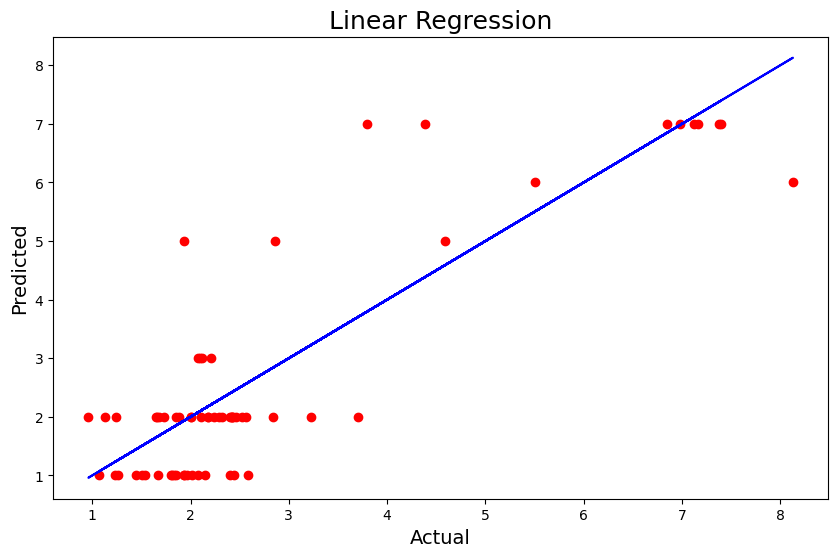

In [74]:
#scatter plot with the actual vs. predicted values for Linear Regression
plt.figure(figsize=(10,6))
plt.scatter(x=pred_LR,y=y_test,color='r')
plt.plot(pred_LR,pred_LR,color='b')
plt.xlabel('Actual',fontsize=14)
plt.ylabel('Predicted',fontsize=14)
plt.title('Linear Regression',fontsize=18)
plt.show()

In [75]:
RFR = RandomForestRegressor()

# Fit the model to the training data
RFR.fit(x_train, y_train)

# Make predictions on the test set
pred_RFR =RFR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = RFR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_RFR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_RFR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_RFR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_RFR)))

R2_score: 0.846496709345459
R2_score on training data: 96.61228892118545
Mean Absolute Error: 0.5203076923076924
Mean Squared Error: 0.6072553846153846
Root Mean Squared Error: 0.7792659267640185


In [78]:
knn = KNN()

# Fit the model to the training data
knn.fit(x_train, y_train)

# Make predictions on the test set
pred_knn =knn.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = knn.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_knn))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_knn))
print('Mean Squared Error:', mean_squared_error(y_test, pred_knn))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_knn)))

R2_score: 0.7514179729568027
R2_score on training data: 78.05251684113361
Mean Absolute Error: 0.64
Mean Squared Error: 0.9833846153846154
Root Mean Squared Error: 0.9916575091152264


In [85]:
GBR = GradientBoostingRegressor()

# Fit the model to the training data
GBR.fit(x_train, y_train)

# Make predictions on the test set
pred_GBR =GBR.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = GBR.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_GBR))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_GBR))
print('Mean Squared Error:', mean_squared_error(y_test, pred_GBR))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_GBR)))

R2_score: 0.8479610434829654
R2_score on training data: 98.94453908155342
Mean Absolute Error: 0.5335770228409275
Mean Squared Error: 0.6014625134262053
Root Mean Squared Error: 0.7755401430140192


In [86]:
lasso = Lasso()

# Fit the model to the training data
lasso.fit(x_train, y_train)

# Make predictions on the test set
pred_lasso =lasso.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = lasso.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_lasso))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_lasso))
print('Mean Squared Error:', mean_squared_error(y_test, pred_lasso))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_lasso)))

R2_score: 0.4502148813893103
R2_score on training data: 44.59300317425866
Mean Absolute Error: 1.149134847196027
Mean Squared Error: 2.1749369165583596
Root Mean Squared Error: 1.4747667329304521


In [87]:
rd = Ridge()

# Fit the model to the training data
rd.fit(x_train, y_train)

# Make predictions on the test set
pred_rd =rd.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = rd.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_rd))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_rd))
print('Mean Squared Error:', mean_squared_error(y_test, pred_rd))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_rd)))

R2_score: 0.7401222892379596
R2_score on training data: 73.39626183407938
Mean Absolute Error: 0.735003555515155
Mean Squared Error: 1.0280700728228978
Root Mean Squared Error: 1.0139379038298637


In [136]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
# Fit the model to the training data
dtr.fit(x_train, y_train)

# Make predictions on the test set
pred_dtr =dtr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = dtr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_dtr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_dtr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_dtr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_dtr)))

R2_score: 0.7899964101950461
R2_score on training data: 100.0
Mean Absolute Error: 0.4307692307692308
Mean Squared Error: 0.8307692307692308
Root Mean Squared Error: 0.9114654303753


In [139]:
from sklearn.svm import SVR

svr=SVR()
# Fit the model to the training data
svr.fit(x_train, y_train)

# Make predictions on the test set
pred_svr =svr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = svr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_svr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_svr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_svr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_svr)))

R2_score: -0.05343208923364484
R2_score on training data: -10.83904018095756
Mean Absolute Error: 1.2404629869428165
Mean Squared Error: 4.167352411704412
Root Mean Squared Error: 2.0414094179523157


In [143]:
from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
# Fit the model to the training data
etr.fit(x_train, y_train)

# Make predictions on the test set
pred_etr =etr.predict(x_test)

# Make predictions on the training set for evaluation
pred_train = etr.predict(x_train)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred_etr))
print('R2_score on training data:', r2_score(y_train, pred_train)*100)
print('Mean Absolute Error:', mean_absolute_error(y_test, pred_etr))
print('Mean Squared Error:', mean_squared_error(y_test, pred_etr))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred_etr)))

R2_score: 0.8845509154002633
R2_score on training data: 100.0
Mean Absolute Error: 0.4529230769230769
Mean Squared Error: 0.4567138461538462
Root Mean Squared Error: 0.6758060714094289


In [144]:
from sklearn.model_selection import cross_val_score

In [ ]:
""" default scoring parameter in cross validation for classification models is - accuracy
default scoring parameter in cross validation for regression model is - r squared score  .
and since its a regression model we should look for r squared score """

In [145]:
#cross_val_score on the Linear regression model (to insure overfitting or not )

score= cross_val_score(LR,x,y, cv=5, scoring='r2')
print(score)
print(score.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_LR)- score.mean())*100)

[  0.          -1.89275799   0.          -0.71762483 -28.10389498]
-6.142855558800919
Difference between R2 score and cross validation score is  688.542534249847


In [146]:
#cross_val_score on the RandomForestRegressor
score1= cross_val_score(RFR,x,y, cv=5, scoring='r2')
print(score1)
print(score1.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_RFR)- score1.mean())*100)

[  0.          -4.6600044    0.          -0.2041227  -21.72169093]
-5.3171636052955735
Difference between R2 score and cross validation score is  616.3660314641032


In [147]:
#cross_val_score on the KNN

score2= cross_val_score(knn,x,y, cv=5, scoring='r2')
print(score2)
print(score2.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_knn)- score2.mean())*100)

[  0.          -3.5787037    0.          -0.38022827 -35.03721419]
-7.799229233193836
Difference between R2 score and cross validation score is  855.064720615064


In [148]:
#cross_val_score on the GradientBoostingRegressor

score3= cross_val_score(GBR,x,y, cv=5, scoring='r2')
print(score3)
print(score3.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_GBR)- score3.mean())*100)

[  0.          -4.18056443   0.          -0.3209367  -19.36451364]
-4.773202952842456
Difference between R2 score and cross validation score is  562.1163996325422


In [149]:
#cross_val_score on the lasso
score4= cross_val_score(lasso,x,y, cv=5, scoring='r2')
print(score4)
print(score4.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_lasso)- score4.mean())*100)

[  0.          -5.60271101   0.           0.17384061 -52.22070814]
-11.529915708578972
Difference between R2 score and cross validation score is  1198.0130589968282


In [150]:
#cross_val_score on the Ridge
score5= cross_val_score(rd,x,y, cv=5, scoring='r2')
print(score5)
print(score5.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_rd)- score5.mean())*100)

[  0.          -1.81630685   0.          -0.61304197 -24.37448869]
-5.360767502731827
Difference between R2 score and cross validation score is  610.0889791969786


In [151]:
#cross_val_score on the DecisionTreeRegressor
score6= cross_val_score(dtr,x,y, cv=5, scoring='r2')
print(score6)
print(score6.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_dtr)- score6.mean())*100)

[  0.         -10.5462963    0.          -0.79323968 -17.48883049]
-5.765673293286388
Difference between R2 score and cross validation score is  655.5669703481434


In [152]:
#cross_val_score on the SVR
score7= cross_val_score(svr,x,y, cv=5, scoring='r2')
print(score7)
print(score7.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_svr)- score7.mean())*100)

[  0.          -2.17391712   0.          -0.89502374 -50.46789191]
-10.70736655374326
Difference between R2 score and cross validation score is  1065.3934464509614


In [153]:
#cross_val_score on the ExtraTreesRegressor
score8= cross_val_score(etr,x,y, cv=5, scoring='r2')
print(score8)
print(score8.mean())
print('Difference between R2 score and cross validation score is ',(r2_score(y_test,pred_etr)- score8.mean())*100)

[  0.          -5.12387685   0.          -0.23921545 -26.20083364]
-6.312785188790061
Difference between R2 score and cross validation score is  719.7336104190324


In [154]:
#GridSearchCV performs a search over the specified parameter values using cross-validation. (Gradient Boosting Regressor)

from sklearn.model_selection import GridSearchCV
# Initialize the model
GBR = GradientBoostingRegressor() #already defined above still writing to easy remember

# Define the hyperparameters and their possible values
param_grid = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV
gscv = GridSearchCV(estimator=GBR, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the model to the training data
gscv.fit(x_train, y_train)


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='neg_mean_squared_error')

In [155]:
gscv.best_params_

{'learning_rate': 0.2,
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 50}

In [156]:
# Get the best parameters and best model
best_params = gscv.best_params_
best_model = gscv.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Best Hyperparameters: {best_params}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Mean Squared Error: 0.7660438192035124
R-squared: 0.8063578355788656


In [157]:
from sklearn.ensemble import GradientBoostingRegressor

Model = GradientBoostingRegressor(n_estimators=100,learning_rate=0.1,max_depth=3,subsample=1.0,random_state=1)

In [158]:
#Again building the model & checking the performance

Model.fit(x_train, y_train)

# Make predictions on the test set
pred =Model.predict(x_test)

# Evaluate the model
print('R2_score:', r2_score(y_test, pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, pred)))

R2_score: 0.8458109473069644
Mean Absolute Error: 0.5322571838315177
Mean Squared Error: 0.6099682430086147
Root Mean Squared Error: 0.781004636995591


In [159]:
# Now Saving the model , after checking the performance of the final model

import pickle
filename='Insurence_cost.pkl'
pickle.dump(Model,open(filename,'wb'))  #saved model